In [1]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)
library(summarytools)
library(corrplot)
library(DataExplorer)
library(psych)
library(caret)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.95 loaded


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Loading required package: lattice



In [3]:
# Load the Excel file
data <- read_excel("online_retail.xlsx")

In [4]:
# View basic structure and summary
str(data)
summary(data)
dfSummary(data)

tibble [541,909 × 8] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr [1:541909] "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: POSIXct[1:541909], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : num [1:541909] 17850 17850 17850 17850 17850 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                       UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.06   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00.00   1st Qu.:     1.25   1st Qu.:13953   
 Median :2011-07-19 17:17:00.00   Median :     2.08   Median :15152   
 Mean   :2011-07-04 13:34:57.16   Mean   :     4.61   Mean   :15288   
 3rd Qu.:2011-10-19 1

,No,Variable,Stats / Values,Freqs (% of Valid),Graph,text.graph,Valid,Missing
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,InvoiceNo\ [character],1\. 573585\ 2\. 581219\ 3\. 581492\ 4\. 580729\ 5\. 558475\ 6\. 579777\ 7\. 581217\ 8\. 537434\ 9\. 580730\ 10\. 538071\ [ 25890 others ],\ 1114 ( 0.2%)\ \ 749 ( 0.1%)\ \ 731 ( 0.1%)\ \ 721 ( 0.1%)\ \ 705 ( 0.1%)\ \ 687 ( 0.1%)\ \ 676 ( 0.1%)\ \ 675 ( 0.1%)\ \ 662 ( 0.1%)\ \ 652 ( 0.1%)\ \534537 (98.6%),"<img style=""border:none;background-color:transparent;padding:0;max-width:max-content;"" src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAAEKBAMAAABnEUMiAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAPUExURf////3+/aampvDw8P///7GHRIEAAAACdFJOUwAAdpPNOAAAAAFiS0dEAIgFHUgAAAAHdElNRQfpBBgQGyeNqOTbAAAApklEQVR42u3VQRECQRAEwbOAhAYH4N/bfXBAE7ETkyUgv3VdapRHKyAQCARuB2veYjBAIBAIBJbAmjcHDBAIBAKBp4I1bw4YIBAIBAJPBWveHDBAIBAIBJbAmrcYDBAIBAKBJbDmLQYDBAKBQGAJrHlzwACBQCAQeCpY8+aAAQKBQCDwVLDmzQEDBAKBQGAJrHmLwWetL/j6lHoDgUAg8L9gfQH6rRvOh7pqZ49ItAAAAABJRU5ErkJggg=="">",\ \ \ \ \ \ \ \ \ \ IIIIIIIIIIIIIIIIIII,541909\ (100.0%),0\ (0.0%)
2,2,StockCode\ [character],1\. 85123A\ 2\. 22423\ 3\. 85099B\ 4\. 47566\ 5\. 20725\ 6\. 84879\ 7\. 22720\ 8\. 22197\ 9\. 21212\ 10\. 20727\ [ 4060 others ],\ 2313 ( 0.4%)\ \ 2203 ( 0.4%)\ \ 2159 ( 0.4%)\ \ 1727 ( 0.3%)\ \ 1639 ( 0.3%)\ \ 1502 ( 0.3%)\ \ 1477 ( 0.3%)\ \ 1476 ( 0.3%)\ \ 1385 ( 0.3%)\ \ 1350 ( 0.2%)\ \524678 (96.8%),"<img style=""border:none;background-color:transparent;padding:0;max-width:max-content;"" src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJ0AAAEKBAMAAAD6HEqqAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAPUExURf////3+/aampvDw8P///7GHRIEAAAACdFJOUwAAdpPNOAAAAAFiS0dEAIgFHUgAAAAHdElNRQfpBBgQGyeNqOTbAAAAqElEQVR42u3UQRUCUQwEwZUADghIWP/euKAgzOHnpVpAHfu69G/1zPTg8Xg83iovxK31isfj8Xi8hhfixnjF4/F4PN4BXogb4xWPx+PxeAd4IW6MVzwej8fjNbwQt9YrHo/H4/EaXohb6xWPx+PxeA0vxI3xisfj8Xi8A7wQN8YrHo/H4/EO8ELcGK94PB6Px2t4IW6t9w71+nmfOxOPx+Pxsl769+r3BXVSpIzFv4LyAAAAAElFTkSuQmCC"">",\ \ \ \ \ \ \ \ \ \ IIIIIIIIIIIIIIIIIII,541909\ (100.0%),0\ (0.0%)
3,3,Description\ [character],1\. WHITE HANGING HEART T-LIG\ 2\. REGENCY CAKESTAND 3 TIER\ 3\. JUMBO BAG RED RETROSPOT\ 4\. PARTY BUNTING\ 5\. LUNCH BAG RED RETROSPOT\ 6\. ASSORTED COLOUR BIRD ORNA\ 7\. SET OF 3 CAKE TINS PANTRY\ 8\. PACK OF 72 RETROSPOT CAKE\ 9\. LUNCH BAG BLACK SKULL.\ 10\. NATURAL SLATE HEART CHALK\ [ 4201 others ],\ 2369 ( 0.4%)\ \ 2200 ( 0.4%)\ \ 2159 ( 0.4%)\ \ 1727 ( 0.3%)\ \ 1638 ( 0.3%)\ \ 1501 ( 0.3%)\ \ 1473 ( 0.3%)\ \ 1385 ( 0.3%)\ \ 1350 ( 0.2%)\ \ 1280 ( 0.2%)\ \523373 (96.8%),"<img style=""border:none;background-color:transparent;padding:0;max-width:max-content;"" src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJ0AAAEKBAMAAAD6HEqqAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAPUExURf////3+/aampvDw8P///7GHRIEAAAACdFJOUwAAdpPNOAAAAAFiS0dEAIgFHUgAAAAHdElNRQfpBBgQGygdF/lKAAAAqElEQVR42u3UQRUCUQwEwZUADghIWP/euKAgzOHnpVpAHfu69G/1zPTg8Xg83iovxK31isfj8Xi8hhfixnjF4/F4PN4BXogb4xWPx+PxeAd4IW6MVzwej8fjNbwQt9YrHo/H4/EaXohb6xWPx+PxeA0vxI3xisfj8Xi8A7wQN8YrHo/H4/EO8ELcGK94PB6Px2t4IW6t9w71+nmfOxOPx+Pxsl769+r3BXVSpIzFv4LyAAAAAElFTkSuQmCC"">",\ \ \ \ \ \ \ \ \ \ IIIIIIIIIIIIIIIIIII,540455\ (99.7%),1454\ (0.3%)
4,4,Quantity\ [numeric],Mean (sd) : 9.6 (218.1)\ min < med < max:\ -80995 < 3 < 80995\ IQR (CV) : 9 (22.8),722 distinct values,"<img style=""border:none;background-color:transparent;padding:0;max-width:max-content;"" src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJgAAABuBAMAAAApJ8cWAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAPUExURf////3+/aampvDw8P///7GHRIEAAAACdFJOUwAAdpPNOAAAAAFiS0dEAIgFHUgAAAAHdElNRQfpBBgQGygdF/lKAAAAVklEQVRo3u3ZQQ3AMAwEQVNoIbgMav7ckiBIZOU5+z4NgYtQp2fbm7PN5hyrqh8Gg8FgMBgMBoPBYDAYDAaDwWAwGAwGg8FgXWxduNewb0LnWF4p1GkAYbAVB6V9eXEAAAAASUVORK5CYII="">",\ \ \ \ \ \ \ \ \ \ :\ \ \ \ \ \ \ \ \ \ \ :\ \ \ \ \ \ \ \ \ \ \ :\ \ \ \ \ \ \ \ \ \ \ :\ \ \ \ \ \ \ \ \ \ \ :,541909\ (100.0%),0\ (0.0%)
5,5,"InvoiceDa

In [5]:
# Check for missing values
missing_data <- sapply(data, function(x) sum(is.na(x)))
print(missing_data)

  InvoiceNo   StockCode Description    Quantity InvoiceDate   UnitPrice 
          0           0        1454           0           0           0 
 CustomerID     Country 
     135080           0 


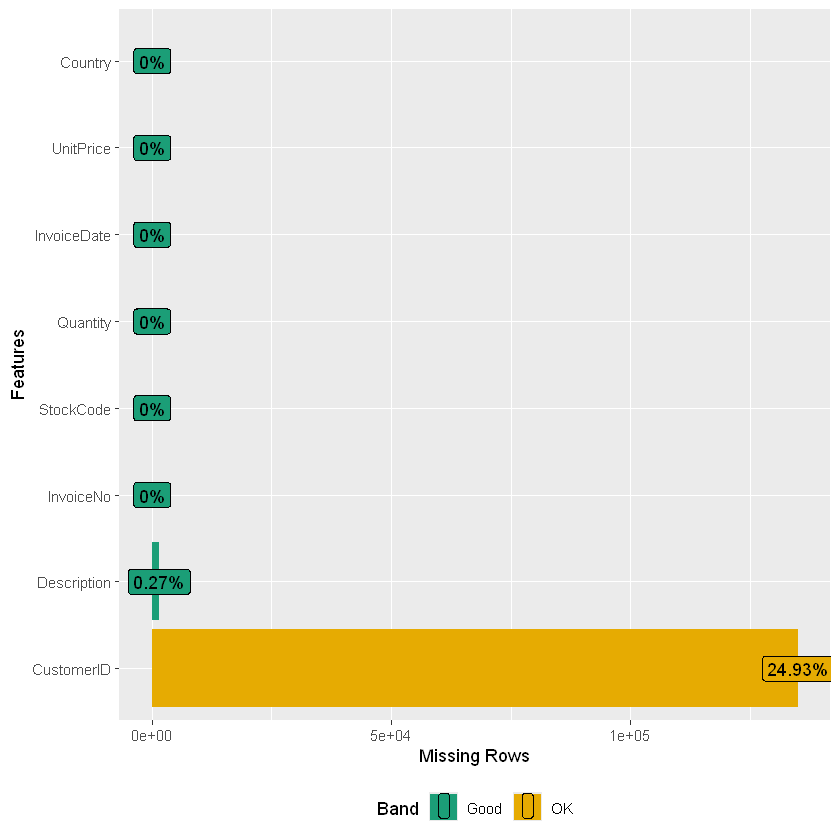

In [6]:
# Visualize missing data
plot_missing(data)

In [8]:
# Drop columns with too many NAs (threshold: 50%)
threshold <- 0.5 * nrow(data)
data_clean <- data[, colSums(is.na(data)) <= threshold]

# Impute or remove remaining missing values
# Example: fill NA with median for numeric columns
data_clean <- data_clean %>% mutate(across(where(is.numeric), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))


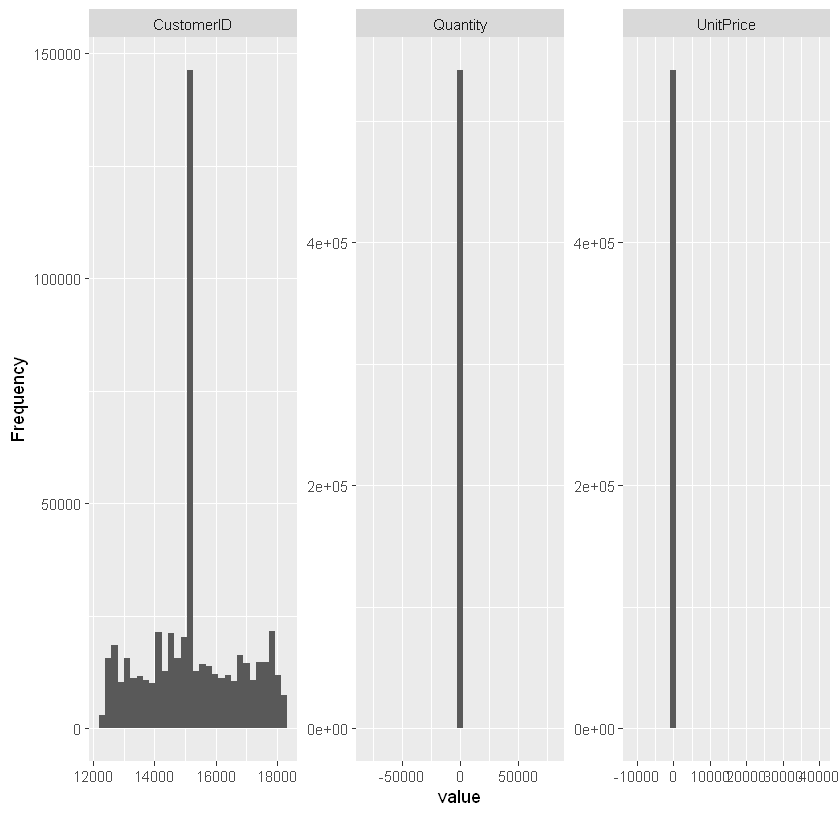

In [9]:
# Distribution of numeric variables
plot_histogram(data_clean)

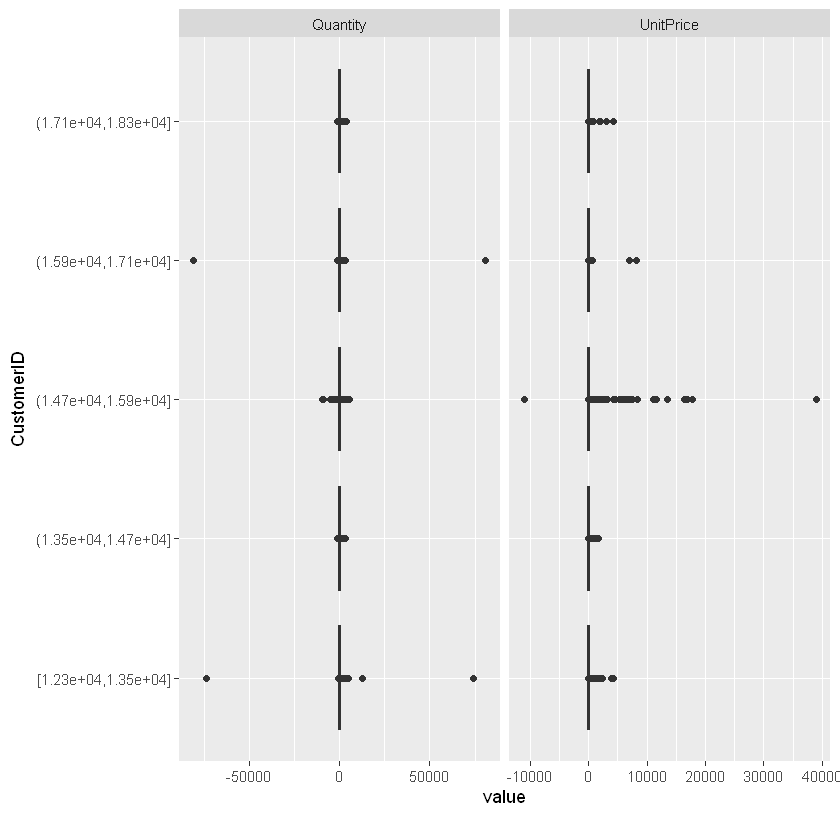

In [10]:
# Boxplots for outlier detection
plot_boxplot(data_clean, by = "CustomerID")  # use another categorical column if needed

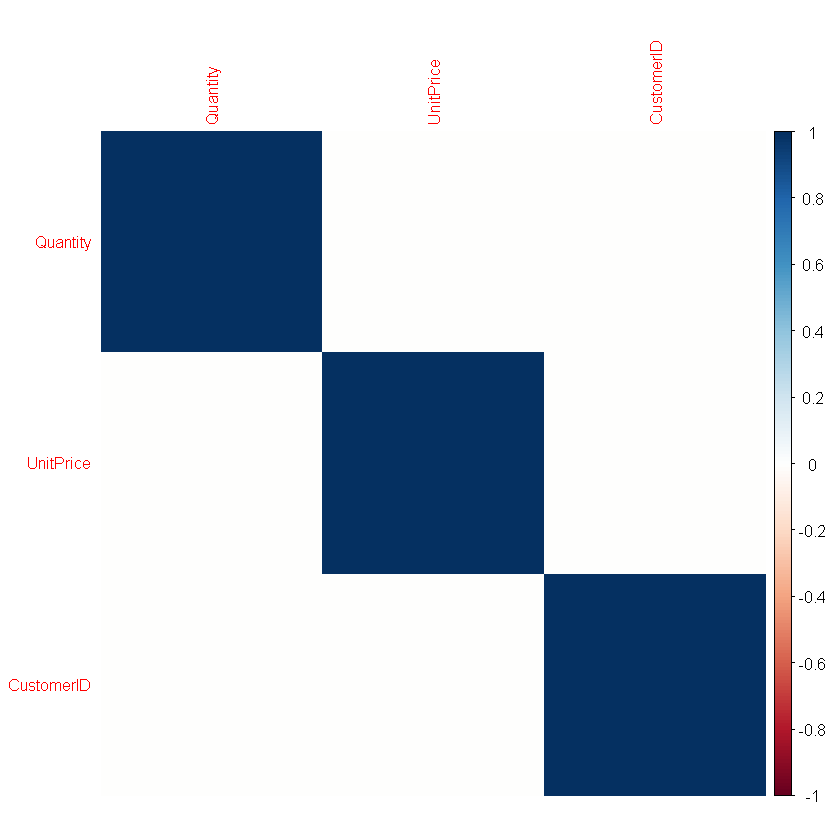

In [11]:
# Correlation analysis
numeric_data <- data_clean %>% select(where(is.numeric)) %>% na.omit()
cor_matrix <- cor(numeric_data)
corrplot(cor_matrix, method = "color", tl.cex = 0.8)

In [12]:
# Remove near-zero variance features
nzv <- nearZeroVar(numeric_data)
if (length(nzv) > 0) {
  numeric_data <- numeric_data[, -nzv]
}

In [14]:
# Skewness check and transformation (if needed)
skew_vals <- apply(numeric_data, 2, skew)
print(skew_vals)

   Quantity   UnitPrice  CustomerID 
 -0.2640748 186.5059392   0.1024627 


In [15]:
# Apply log transformation where skew > 1
numeric_data_transformed <- numeric_data %>%
  mutate(across(where(~ abs(skew(.)) > 1), ~ log1p(.)))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `across(where(~abs(skew(.)) > 1), ~log1p(.))`.
Caused by warning in `log1p()`:
! NaNs produced"


In [25]:
# Final dataset
data_final <- cbind(data_clean %>% select(-where(is.numeric)), numeric_data_transformed)

In [26]:
data_final <- data_final %>%
  filter(Quantity >= 1, UnitPrice >= 1)

In [27]:
# Quick overview
introduce(data_final)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
295771,8,5,3,0,0,295771,2366168,20417648


In [28]:
write.csv(data_final, "data_final.csv", row.names = FALSE)